In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('raw-data/3-month-libor-rate-historical-chart.csv', delimiter = ',')

In [2]:
df.head()

,date,value
0,02/01/1986,8.0000
1,03/01/1986,8.0625
2,06/01/1986,8.1250
3,07/01/1986,8.1250
4,08/01/1986,8.0000


In [3]:
#df1 = df.set_index('date').diff()
df['dailychange%'] = (df['value']-df['value'].shift(1))/df['value'].shift(1)*100
df.head()

,date,value,dailychange%
0,02/01/1986,8.0000,NaN
1,03/01/1986,8.0625,0.781250
2,06/01/1986,8.1250,0.775194
3,07/01/1986,8.1250,0.000000
4,08/01/1986,8.0000,-1.538462


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [5]:
dfr = df['dailychange%']
dfr = dfr.iloc[1:]
dfr.head()

1    0.781250
2    0.775194
3    0.000000
4   -1.538462
5    2.343750
Name: dailychange%, dtype: float64

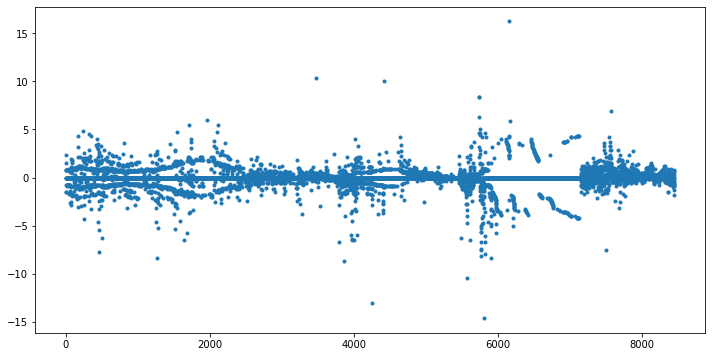

In [6]:
plt.figure(figsize=(12,6))
plt.plot(dfr, '.')

In [7]:
sorted_returns = np.sort(dfr, axis = 0)
scaled_returns = (sorted_returns - sorted_returns.mean())/sorted_returns.std()
scaled_returns

array([-14.06160131, -12.56619252, -10.09851221, ...,   9.64969103,
         9.98213431,  15.64265502])

In [8]:
stats.kstest(scaled_returns, 'norm')

KstestResult(statistic=0.27947673000947404, pvalue=0.0)

In [9]:
normal_numbers = np.random.normal(loc = 0, scale = 1, size = np.size(scaled_returns))
normal_numbers = np.sort(normal_numbers)

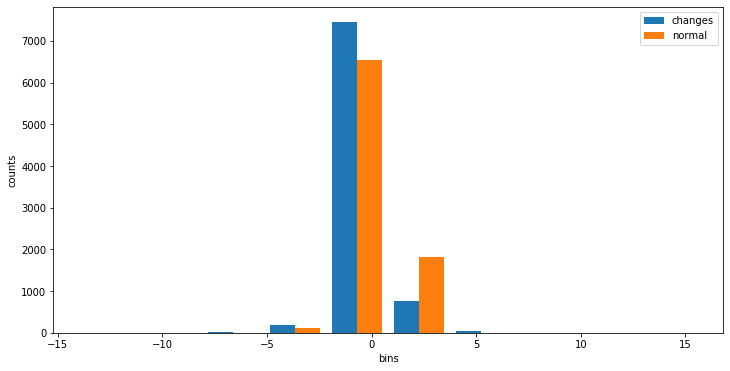

In [10]:
plt.figure(figsize=(12,6))
plt.hist([scaled_returns,normal_numbers], label=['changes','normal'])
plt.xlabel('bins')
plt.ylabel('counts')
plt.legend(loc = 'best')
ax = plt.gca()
ax.grid(False)

In [11]:
stats.ks_2samp(scaled_returns, normal_numbers)

Ks_2sampResult(statistic=0.2805627807992433, pvalue=1.8119567102870247e-293)

In [12]:
df6 = pd.read_csv('raw-data/6-month-libor-rate-historical-chart.csv', delimiter = ',')

In [13]:
df6['dailychange%'] = (df6['value']-df6['value'].shift(1))/df6['value'].shift(1)*100
df.head()

,date,value,dailychange%
0,02/01/1986,8.0000,NaN
1,03/01/1986,8.0625,0.781250
2,06/01/1986,8.1250,0.775194
3,07/01/1986,8.1250,0.000000
4,08/01/1986,8.0000,-1.538462


In [14]:
dfr6 = df6['dailychange%']
dfr6 = dfr6.iloc[1:]
dfr6.head()

1    0.781250
2    0.775194
3    0.000000
4   -1.538462
5    2.343750
Name: dailychange%, dtype: float64

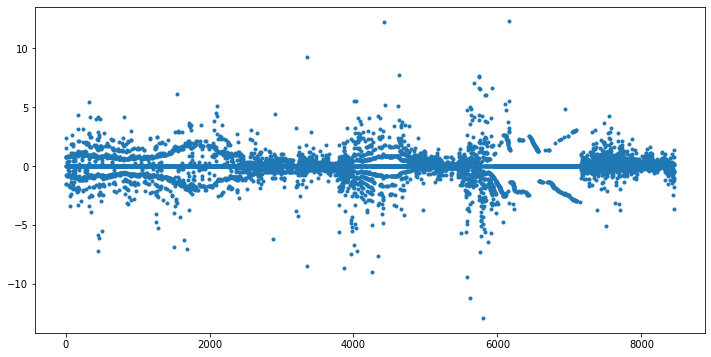

In [15]:
plt.figure(figsize=(12,6))
plt.plot(dfr6, '.')

In [16]:
sorted_returns6 = np.sort(dfr6, axis = 0)
scaled_returns6 = (sorted_returns6 - sorted_returns6.mean())/sorted_returns6.std()

In [104]:
stats.kstest(scaled_returns6, 'norm')

KstestResult(statistic=0.22553210052278605, pvalue=0.0)

In [105]:
stats.ks_2samp(scaled_returns, scaled_returns6)

Ks_2sampResult(statistic=0.4567273587136439, pvalue=0.0)

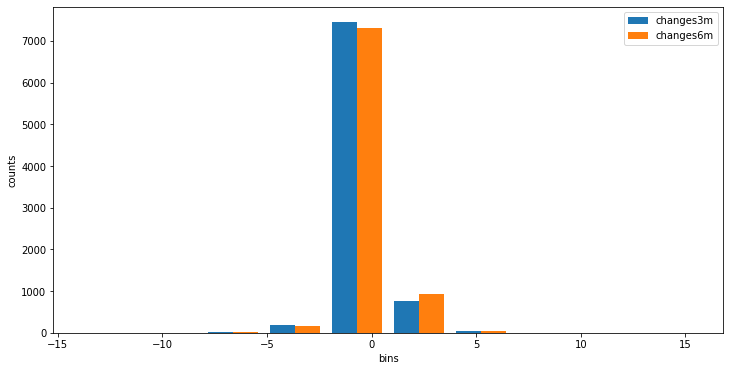

In [17]:
plt.figure(figsize=(12,6))
plt.hist([scaled_returns,scaled_returns6], label=['changes3m','changes6m'])
plt.xlabel('bins')
plt.ylabel('counts')
plt.legend(loc = 'best')